Exercise 9.

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [2]:
import time
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
start = time.time()
rf_clf.fit(X_train, y_train)
end = time.time()
print(f'{end - start} sec')

37.88199853897095 sec


In [3]:
from sklearn.metrics import accuracy_score

y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [5]:
rf_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
start = time.time()
rf_clf2.fit(X_train_reduced, y_train)
end = time.time()
print(f'{end - start} sec')

77.40654802322388 sec


In [6]:
X_test_reduced = pca.transform(X_test)
y_pred = rf_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9481

Exercise 10.

In [7]:
import numpy as np
from sklearn.manifold import TSNE

y = y.astype(np.uint8)
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_reduced_tsne = tsne.fit_transform(X)

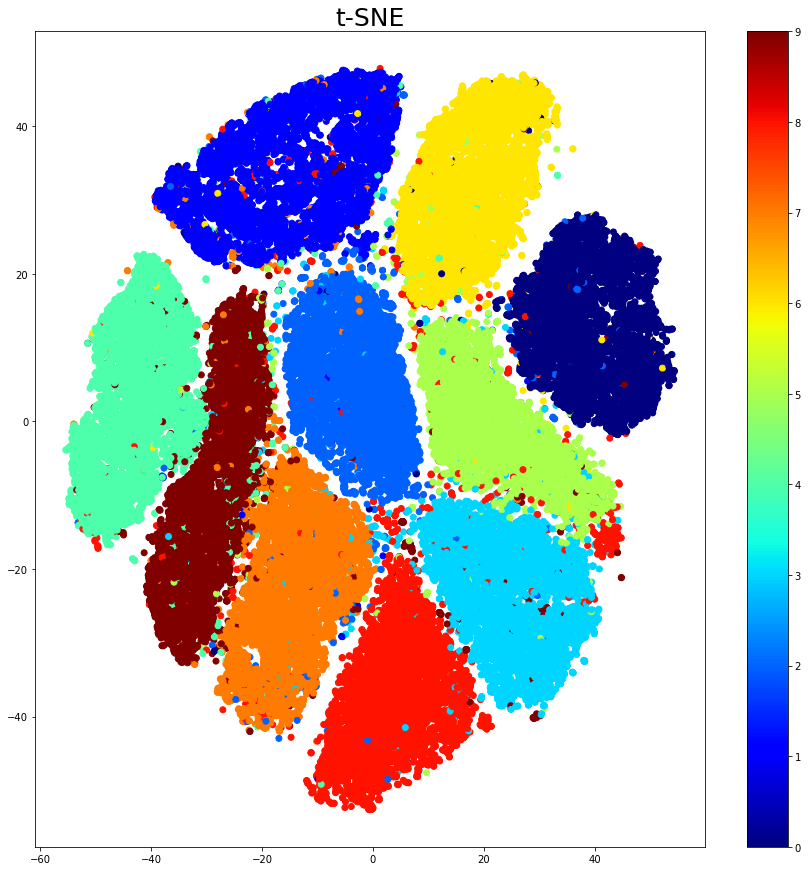

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.title('t-SNE', fontsize=25)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.show()

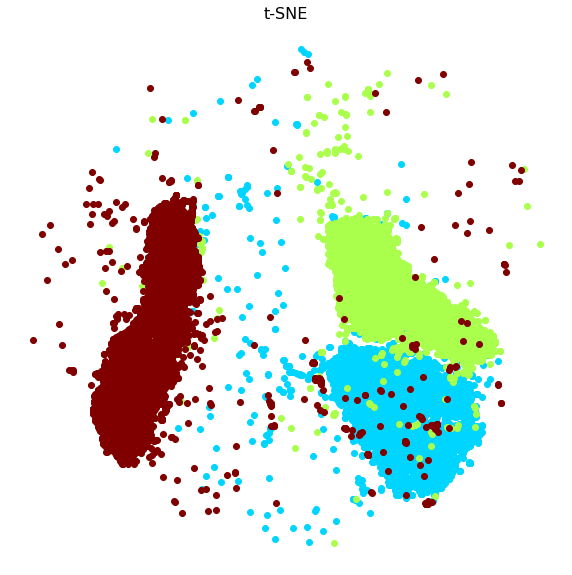

In [9]:
import matplotlib as mpl

plt.figure(figsize=(10, 10))
plt.title('t-SNE', fontsize=16)
plt.axis('off')
cmap = mpl.cm.get_cmap('jet')

for digit in (3, 5, 9):
    plt.scatter(X_reduced_tsne[y == digit, 0], X_reduced_tsne[y == digit, 1], c=[cmap(digit / 9)])
plt.show()

In [10]:
idx = (y == 3) | (y == 5) | (y == 9)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

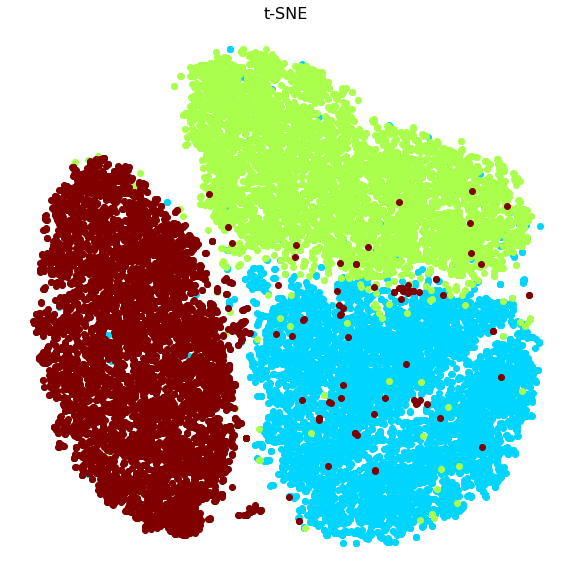

In [11]:
plt.figure(figsize=(10, 10))
plt.title('t-SNE', fontsize=16)
plt.axis('off')

for digit in (3, 5, 9):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(15, 15)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap('jet')
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis('off')
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={'weight': 'bold', 'size': 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap='binary'), image_coord)
                ax.add_artist(imagebox)

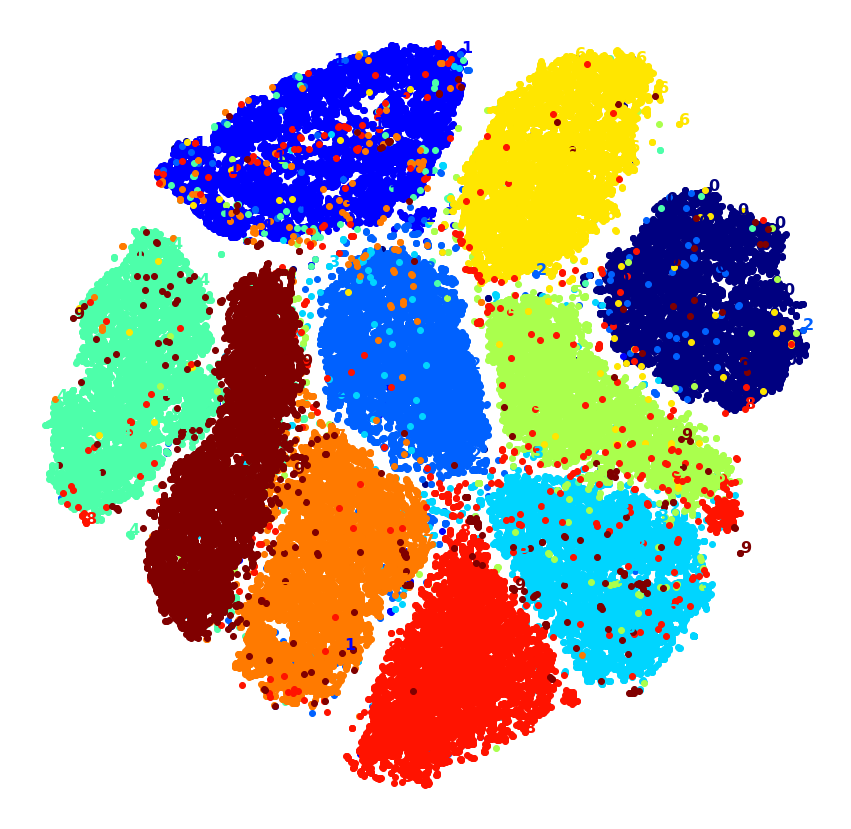

In [13]:
plot_digits(X_reduced_tsne, y)

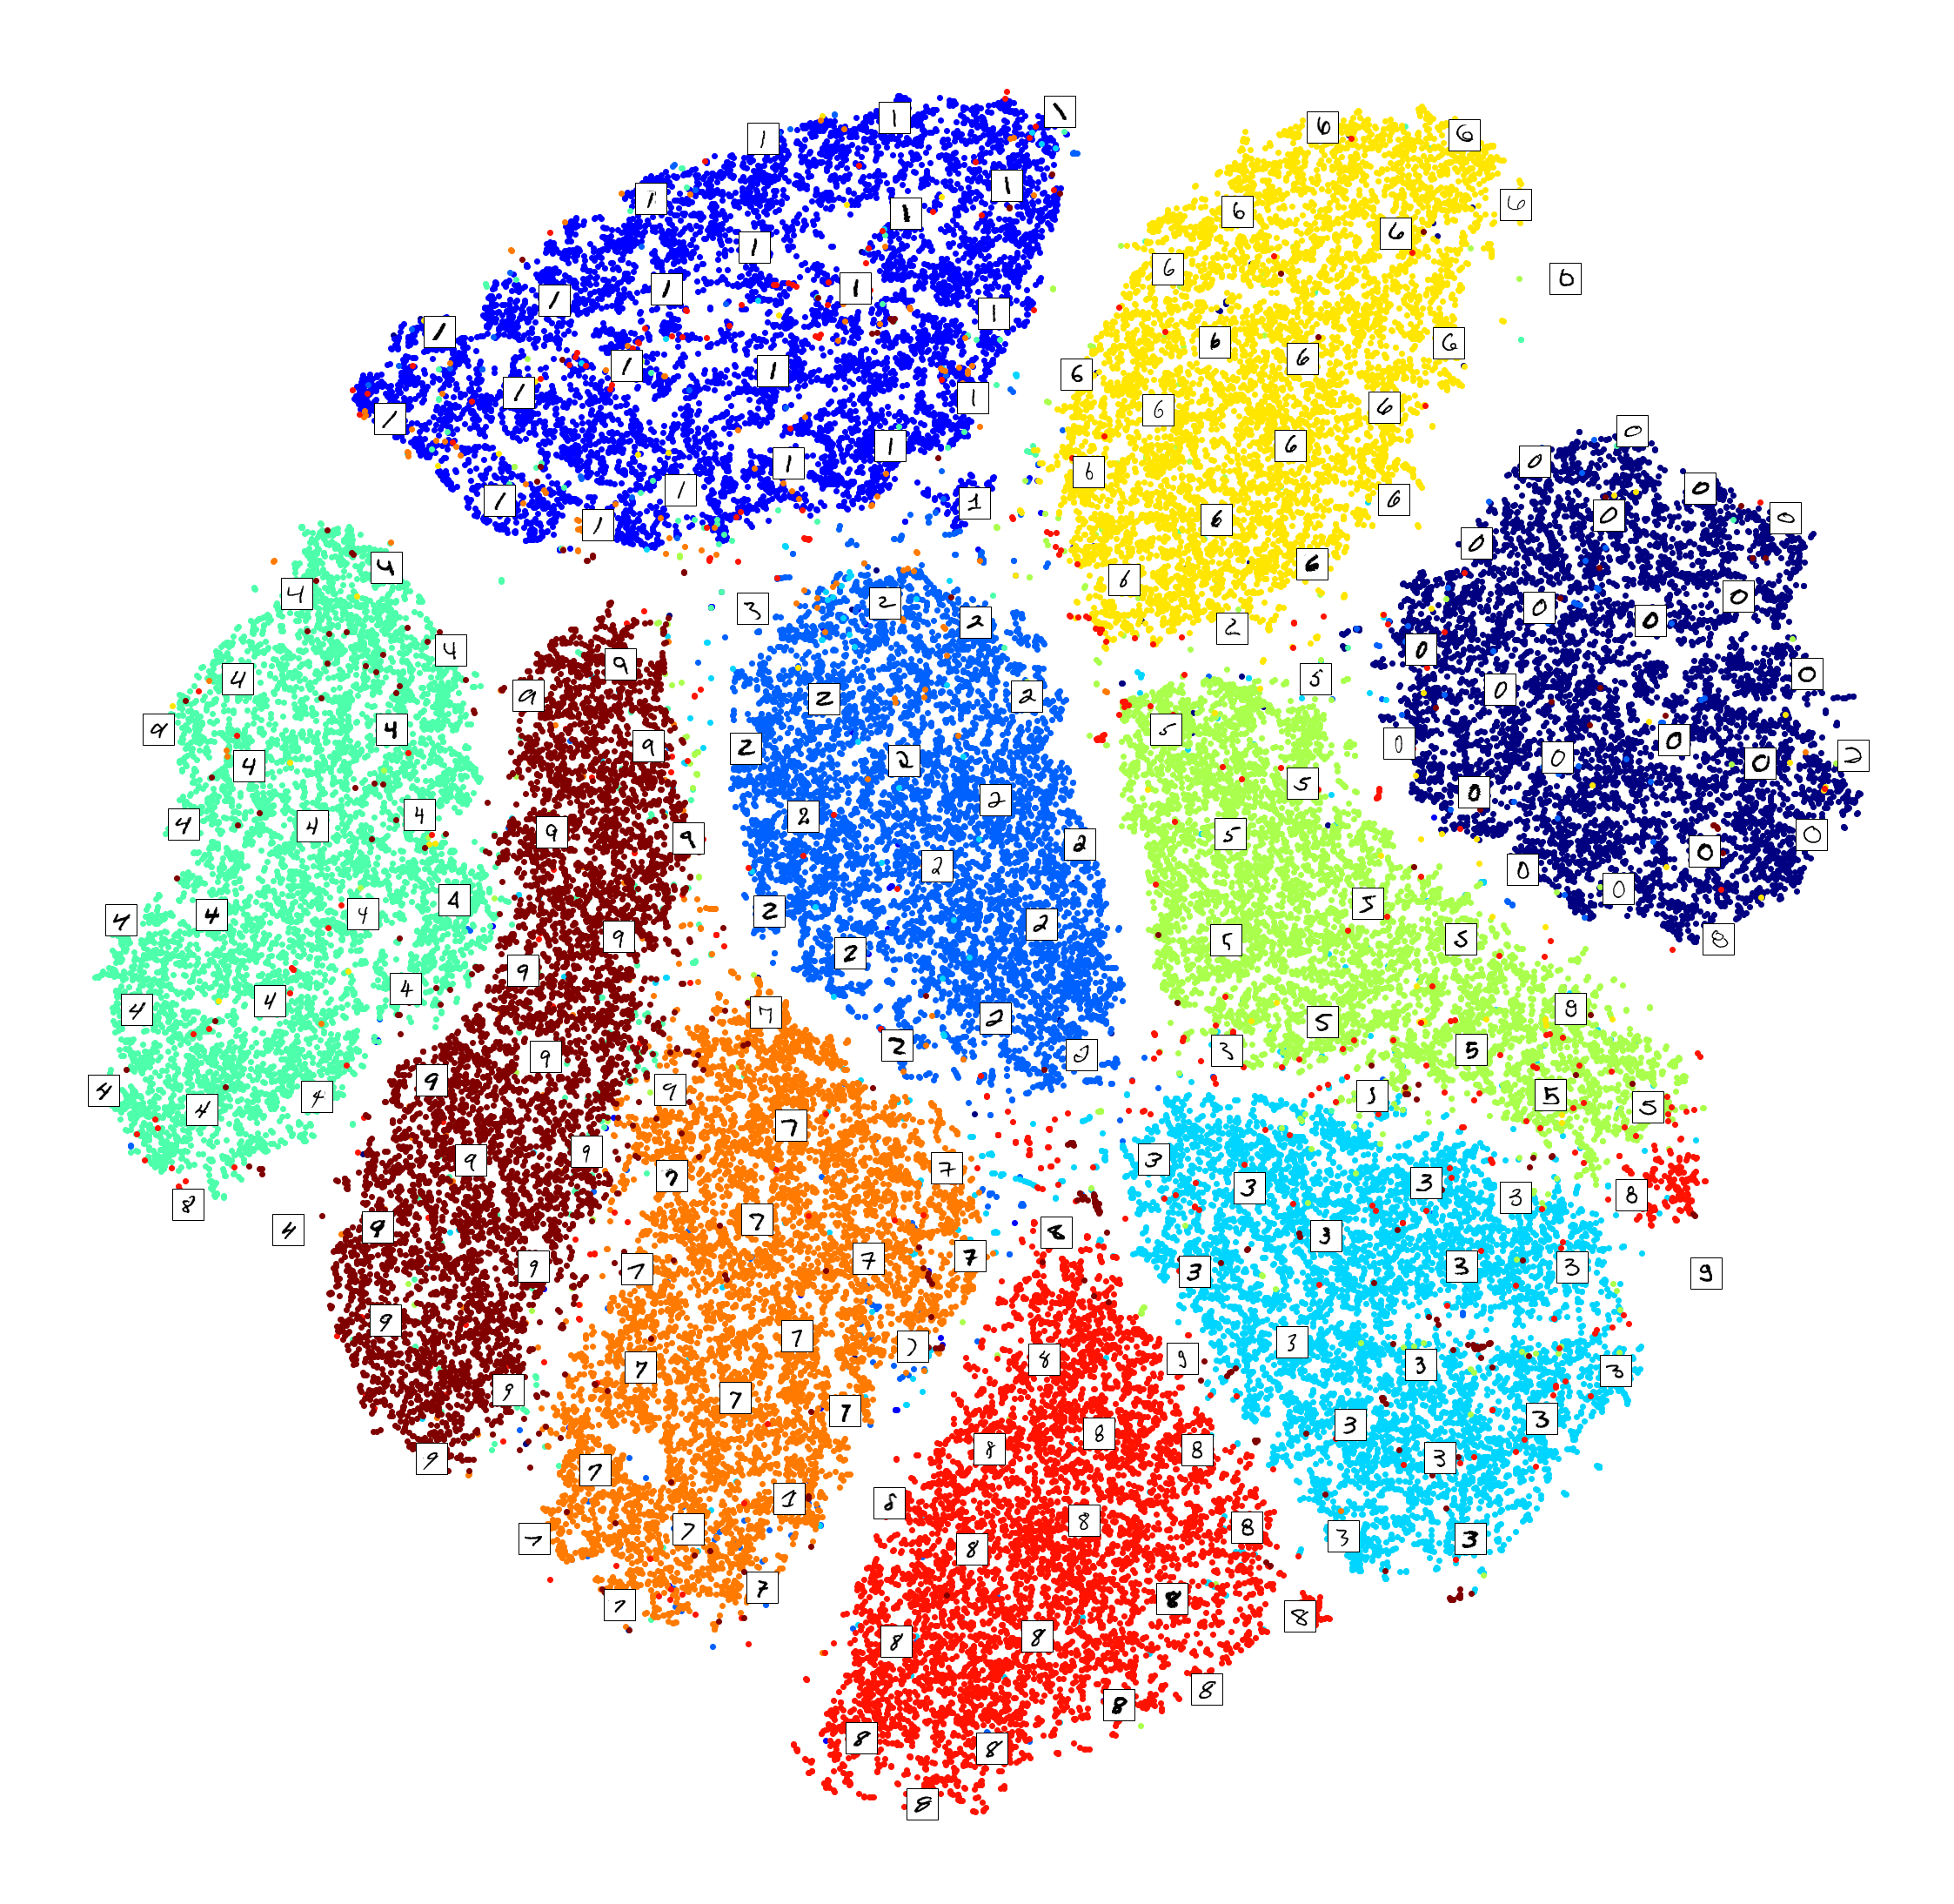

In [14]:
plot_digits(X_reduced_tsne, y, images=X, figsize=(40, 40))

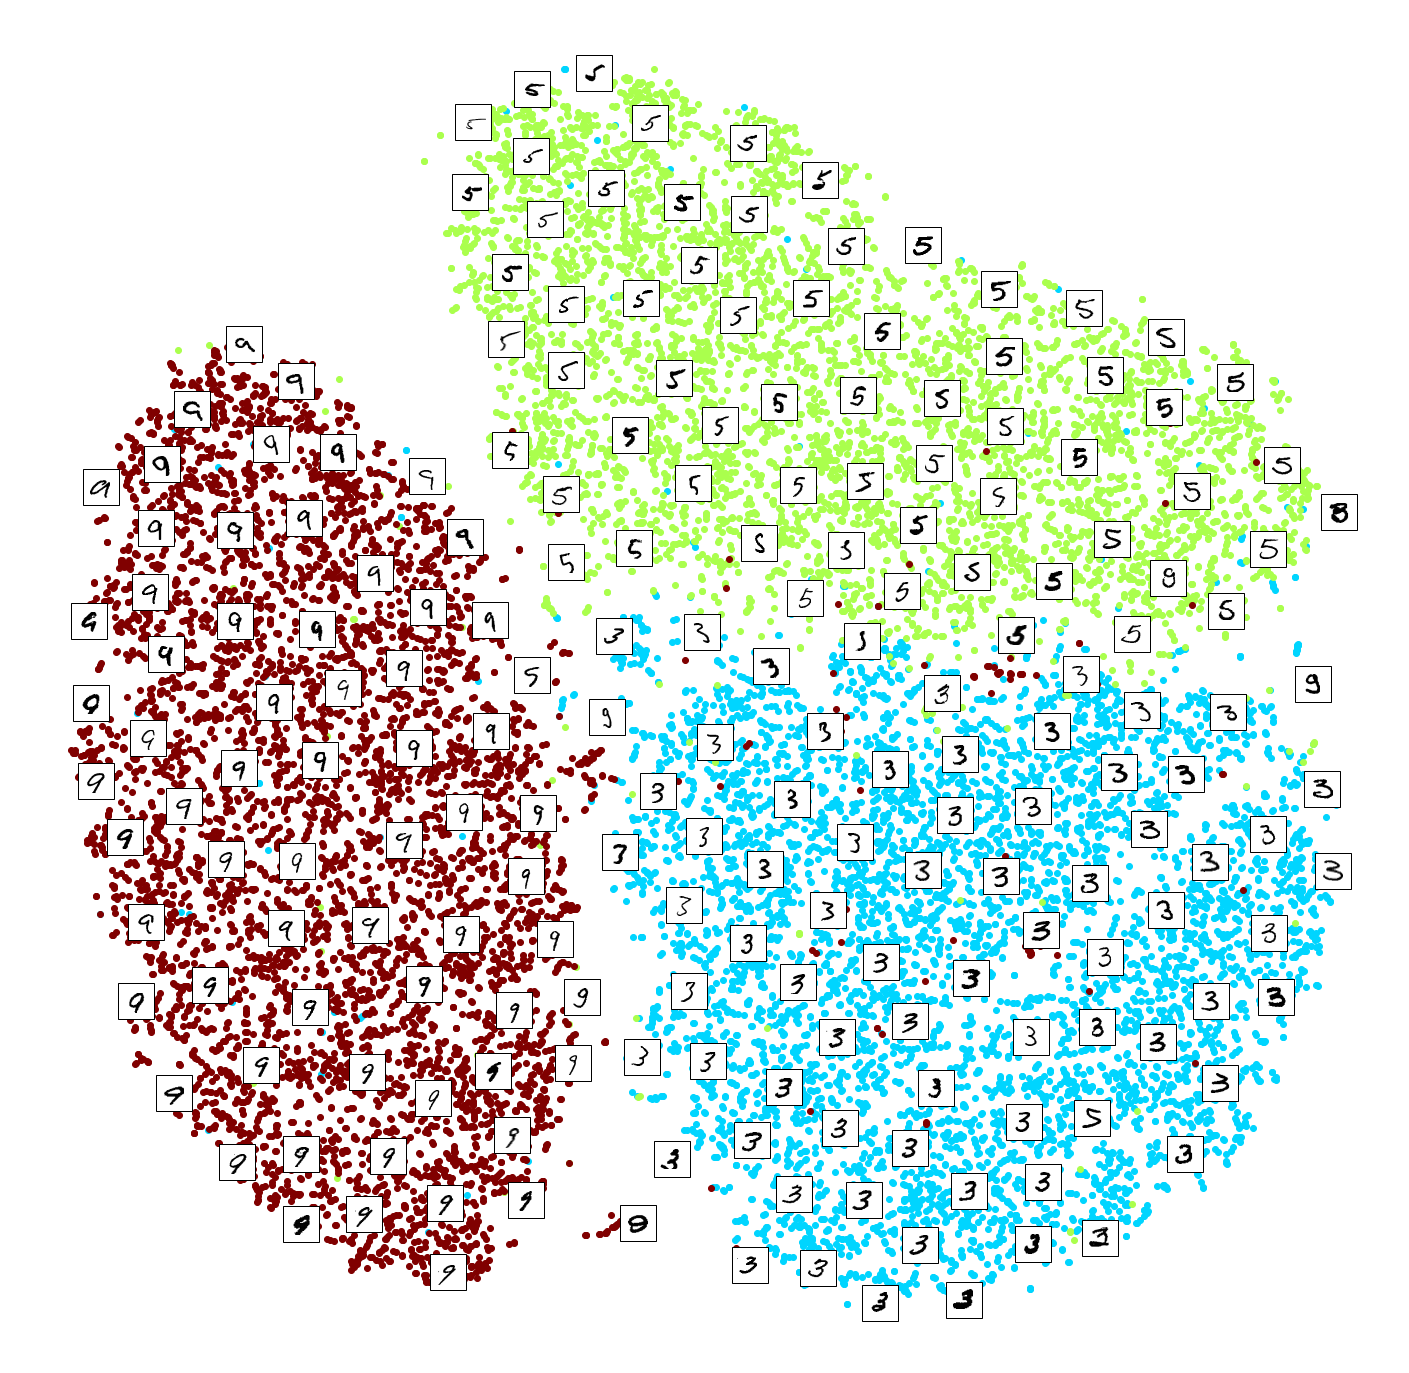

In [15]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(25, 25))